# Physics 5300 Gravitational Orbits

<big><big>

William Hanegan <br>
Prof. Furnstahl <br>
1 May 2020 <br>

<big> 
    In this notebook we would like to analyze the motion of a 2 bodies in gravitational orbit. <br>
    Well we know that the gravitational field has potential energy of the form:
    $\begin{align}
        U(r) = - k m_1 m_2 \Delta r^{-1}
     \end{align}$

<br>

Using the above potential energy equational form we can create the potential energy and kinetic energy equations for each of the two bodies respectively.

$ \begin{align}
    T_i = \frac{1}{2} m_i \dot{r_i}^2 = \frac{1}{2} m_i ( \dot{x_i}^2 + \dot{y_i}^2)
    \end{align}$ <br>
    $\begin{align}
    U_i = U_j = - k m_i m_j \Delta r^{-1} = - k m_i m_j ( (x_i - x_j)^2 + (y_i - y_j)^2 )^{(-1/2)}
    \end{align}$ <br>
    
<br>
    
With both the potential and the Kinetic Energy terms we are able to create a lagrangian for the system with $\mathcal{L}$ = T - U. (We denote the two different masses with i and j in order to differentiate which is which)

<br>
    $\begin{align}
    \mathcal{L_i} = \frac{1}{2} m_i ( \dot{x_i}^2 + \dot{y_i}^2) +  k m_i m_j ( (x_i - x_j)^2 + (y_i - y_j)^2 )^{(-1/2)}
    \end{align}$

<big>
    In similar fashion to the double pendulum problem we now proceed to write out lagranges equations and solve for double time derivative of the variable in question. in this case we will be looking for $\ddot{x_1}$, $\ddot{y_1}$, $\ddot{x_2}$, $\ddot{y_2}$

<br>
<Big>
Starting with our first variable $x_1$

$\begin{align}
\frac{\partial\mathcal{L}}{\partial x_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot{x_1}}
\end{align}$ <br>

$\begin{align}
\ddot{x_1} = \frac{k}{m_2} (x_1 - x_2) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

<big> The rest of the variables Lagrange Equations will take on similar forms:

$\begin{align}
\ddot{x_2} = \frac{k}{m_1} (x_2 - x_1) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

$\begin{align}
\ddot{y_1} = \frac{k}{m_2} (y_1 - y_2) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

$\begin{align}
\ddot{y_2} = \frac{k}{m_1} (y_2 - y_1) * ( (x_1 - x_2)^2 + (y_1 - y_2)^2 )^{-3/2}
\end{align}$

In [63]:
#start by importing all the packages we will need

%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook for the size and resolution of the plots

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [64]:
class orbit:
    """
    Orbit Class uses python differential equations solvers to find the equations of motion for the two body problem in
    cartesian space.
    
    Parameters
    ----------
    m1 and m2 : float
        masses of the two different bodies respectively
    k : float
        analgous to gravitational constant
            

    Methods
    -------
    dy_dt(Z, t)
        Solves for the double time derivative of each coordinate in question (x1,x2,x3,x4) and returns 
        those double time derivatives.
    solve_ode(t_pts, a)
        Given initial conditions for all four coordinates and their time derivatives as well as an array of times t, 
        solve_ode will solve the differential equation in question and return the solution.
    """
    
    def __init__(self, m_1, m_2, k):
        self.m_1 = m_1
        self.m_2 = m_2
        self.k = k       # analgous to the gravitational constant
        
    """
    Takes in some initial conditions and solves for the time derivatives of the 
    of the coordinates in questions and returns those time derivatives.
    
    """
        
        
    def dy_dt(self, Z, t_pts):
        
        rel = ((Z[0]-Z[1])**2 + (Z[2]-Z[3])**2)**0.5
        
        
        ddotx1 = (self.k / self.m_2) * (Z[0]-Z[1])*(rel**-3) 
        ddotx2 = (self.k / self.m_1) * (Z[1]-Z[0])*(rel**-3) 
        ddoty1 = (self.k / self.m_2) * (Z[2]-Z[3])*(rel**-3) 
        ddoty2 = (self.k / self.m_1) * (Z[3]-Z[2])*(rel**-3) 
        
        return [Z[4], Z[5], Z[6], Z[7], ddotx1, ddotx2, ddoty1, ddoty2]
        
    """
    Takes in all the different initial conditions, variables, and an array of time points t
    and then proceeds to solve the differential equations and return the solution.
    
    """
        
    def solve_ode(self, t_pts, Z, abserr=1.0e-8, relerr=1.0e-8):
        
        w = odeint(self.dy_dt, Z, t_pts, atol=abserr, rtol=relerr).T
        
        return w

<br>
<big>
With the class now finished we will assign some value for m1, m2, and k and proceed to solve the differential equation
and plot the equations of motion.

<IPython.core.display.Javascript object>


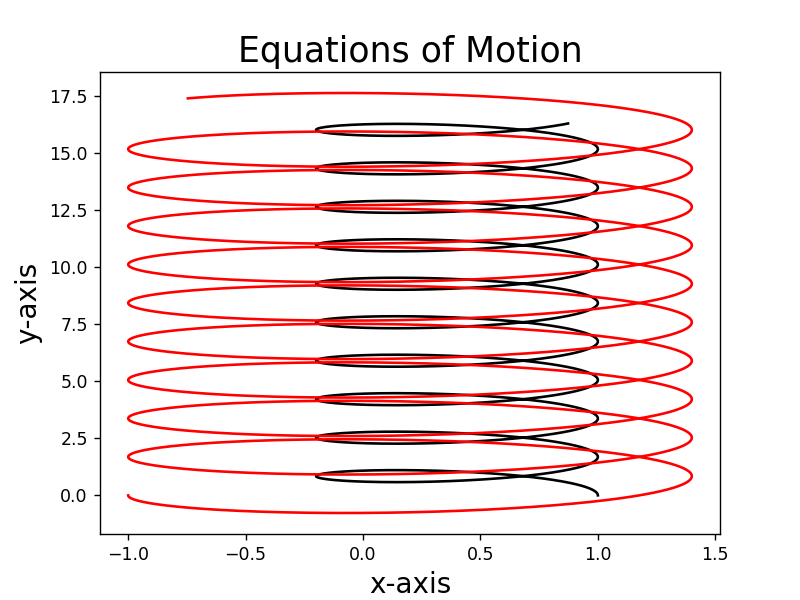

Text(0.5,1,'Equations of Motion')

In [65]:
test = orbit(m_1 = 1.0, m_2 = 2.0, k = -6.0)

t_pts = np.arange(0, 50.0, 0.01)

x1_0 = 1.0
x2_0 = -1.0
y1_0 = 0.0
y2_0 = 0.0

xdot1_0 = 0.0
xdot2_0 = 0.0
ydot1_0 = 1.0
ydot2_0 = -1.0


Z = [x1_0, x2_0, y1_0, y2_0, xdot1_0, xdot2_0, ydot1_0, ydot2_0]

w = test.solve_ode(t_pts, Z)

fig = plt.figure()

plt.plot(w[0],w[2],'k')
plt.plot(w[1],w[3],'r')
plt.xlabel('x-axis',fontsize = 16)
plt.ylabel('y-axis',fontsize = 16)
plt.title('Equations of Motion',fontsize = 20)

<big>
Because we are in the the Center of Mass frame we expect both mass to move around their center of mass throughout cartesian space. This is exactly what we see in the plot above so this plot makes a lot of sense. However, to very the truth of our program we can opt to increase one of the masses to be very large (aka $m_i$ << $m_j$). By doing this we are effectively putting the center of mass in the larger body. If this is, in fact, the case we should expect to see that the smaller masses effectively orbits around the larger mass with the larger mass appearing to not move at all.

<IPython.core.display.Javascript object>


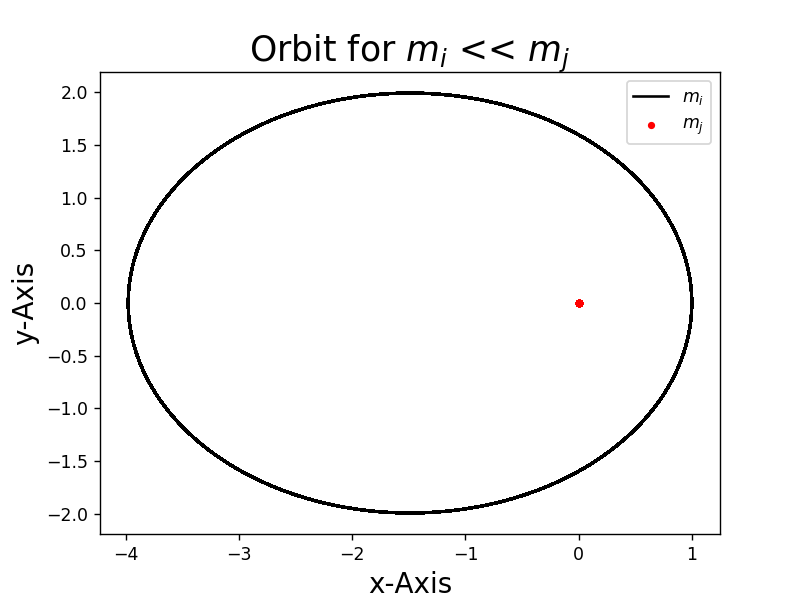

Text(0,0.5,'y-Axis')

In [66]:
kepler = orbit(m_1 = 10.0, m_2 = 10000.0, k = -100.0)

t_pts = np.arange(0, 5000.0, 0.01)

x3_0 = 1.0
x4_0 = 0.0
y3_0 = 0.0
y4_0 = 0.0

xdot3_0 = 0.0
xdot4_0 = 0.0
ydot3_0 = 4.0
ydot4_0 = 0.0


Z2 = [x3_0, x4_0, y3_0, y4_0, xdot3_0, xdot4_0, ydot3_0, ydot4_0]

w2 = kepler.solve_ode(t_pts, Z2)

kepler_fig = plt.figure()

ax1 = kepler_fig.add_subplot(1,1,1)

#my maneuver to get the rest frame of m_2 is to simply subtract m_2's coordinates
ax1.plot(w2[0] - w2[1] ,w2[2] - w2[3],'k', label = '$m_i$') 
ax1.scatter(w2[1] - w2[1], w2[3] - w2[3] , s=10, color='red', label = '$m_j$')
ax1.legend()
ax1.set_title("Orbit for $m_i$ << $m_j$ ", fontsize = 20)
ax1.set_xlabel('x-Axis',fontsize = 16)
ax1.set_ylabel('y-Axis',fontsize = 16)



This happens to be exactly what we see and therefore gives a program a little more validity for giving us an accurate solution to the two body problem.